<center>
    <h1 style="color:blue"> YSU MMF, Python, Spring 2021 </h1>
    <h2 style="color:blue"> Lecture 24 </h2>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('AMZN.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,710.130005,713.250000,700.280029,710.659973,710.659973,5432900
1,2016-05-17,709.900024,714.469971,693.909973,695.270020,695.270020,5121400
2,2016-05-18,689.559998,702.539978,688.760010,697.450012,697.450012,4283200
3,2016-05-19,691.880005,699.400024,689.559998,698.520020,698.520020,3025600
4,2016-05-20,701.049988,707.239990,700.000000,702.799988,702.799988,2916200


- Calculate the daily rates of returns for the Adjusted Close prices

In [6]:
ac = df['Adj Close']

In [7]:
ac_val = ac.values

In [12]:
rr = (ac.values[1:] - ac.values[:-1]) / ac.values[:-1]

- Plot the histogram of Daily Rates of Returns

(array([  7.,  28., 124., 616., 409.,  54.,  14.,   4.,   1.,   1.]),
 array([-0.07922081, -0.05808236, -0.0369439 , -0.01580545,  0.005333  ,
         0.02647145,  0.0476099 ,  0.06874836,  0.08988681,  0.11102526,
         0.13216371]),
 <BarContainer object of 10 artists>)

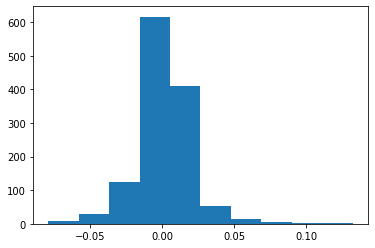

In [15]:
plt.hist(rr)

- Fit the Daily Rates of Returns data by a Normal Distribution

Assume 
$$
rr \sim \mathcal{N}(\mu, \sigma^2)
$$

In [17]:
mu_hat = np.mean(rr)
mu_hat

0.0013699292010878894

In [18]:
sigma_hat = np.std(rr)
sigma_hat

0.01833131759347764

In [19]:
from scipy import stats

In [20]:
Norm = stats.norm(loc=mu_hat, scale=sigma_hat)

In [22]:
x = np.linspace(np.min(rr), np.max(rr), 200)

In [23]:
y = Norm.pdf(x)

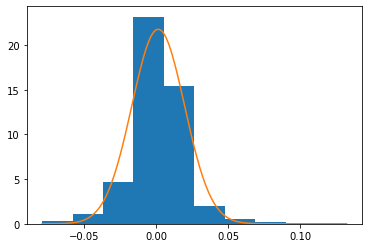

In [26]:
plt.hist(rr, density=True)
plt.plot(x, y)


- Generate possible prices for that stock for future 100 days

In [32]:
future_rr = Norm.rvs(100)

In [33]:
future_price = ac_val[-1] * np.cumprod(1 + future_rr)

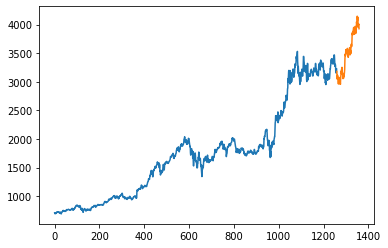

In [41]:
plt.plot(ac_val)
plt.plot(range(len(ac_val), len(ac_val) + len(future_price)),future_price)

- Download the following files .csv files: [link1](https://jovian.ai/kishlayaug15/analysis-of-data-scientist-job-change/v/40/files?filename=hr-analytics-job-change-of-data-scientists/aug_train.csv) and [link2](https://jovian.ai/kishlayaug15/analysis-of-data-scientist-job-change/v/40/files?filename=hr-analytics-job-change-of-data-scientists/aug_test.csv)


- Read the csv files in Pandas as DataFrames

In [45]:
df1 = pd.read_csv('aug_train.csv')
df2 = pd.read_csv('aug_test.csv')

In [47]:
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [46]:
df2.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


- Merge the DataFrames

In [53]:
df = pd.concat([df1, df2], ignore_index=True)

In [54]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

- Get the number of missing values by a variable

In [57]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

- Plot histograms for numerical variables (features)

In [58]:
th = df.training_hours

(array([8071., 5753., 3220., 1737., 1169.,  445.,  346.,  184.,  154.,
         208.]),
 array([  1. ,  34.5,  68. , 101.5, 135. , 168.5, 202. , 235.5, 269. ,
        302.5, 336. ]),
 <BarContainer object of 10 artists>)

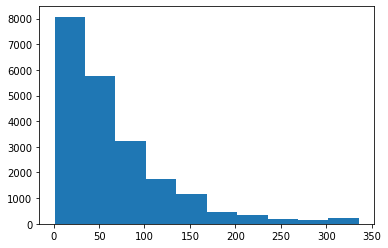

In [60]:
plt.hist(th)

- Plot Boxplots for numerical variables (features)

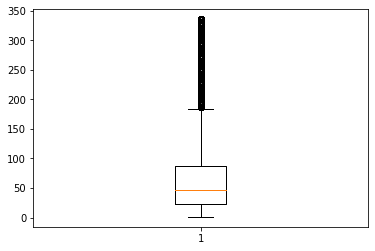

In [63]:
plt.boxplot(th);

- Plot Barplot for categorical variables (features)

In [64]:
gen = df.gender

In [68]:
g = gen.value_counts()
g

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64

<BarContainer object of 3 artists>

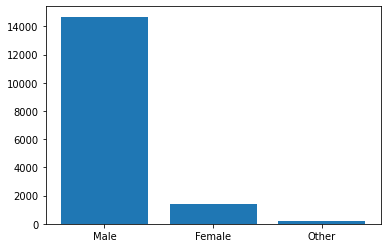

In [69]:
plt.bar(g.index, g.values)

In [71]:
el = df['education_level']

In [73]:
el_c = el.value_counts()
el_c

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

<BarContainer object of 5 artists>

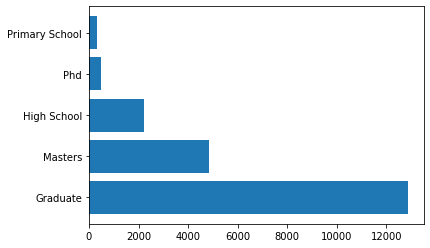

In [74]:
plt.barh(el_c.index, el_c.values)

- Plot comparative histograms/barplots for some variables for different genders

In [84]:
l1 = df.major_discipline[df.gender=='Male']
l2 = df.major_discipline[df.gender=='Female']

In [88]:
l1v = l1.value_counts()
l2v = l2.value_counts()

<BarContainer object of 6 artists>

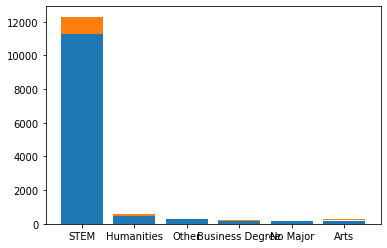

In [89]:
plt.bar(l1v.index, l1v.values)
plt.bar(l2v.index, l2v.values, bottom=l1v.values)